In [7]:
import astropy.units as u

from altaipony.lcio import from_mast
from altaipony.altai import find_iterative_median
from altaipony.flarelc import FlareLightCurve


from lightkurve import search_targetpixelfile

import matplotlib.pyplot as plt
%matplotlib inline

import copy


from scipy.interpolate import UnivariateSpline

import os
import pandas as pd
import numpy as np

from funcs.funcs import read_custom_aperture_lc
from funcs.custom_detrending import custom_detrending



In [8]:
clcs = ! ls /home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/*fits
clcs = [x.split("/")[-1] for x in clcs]

def get_customlc(TIC, c, clcs):
    for p in clcs:
        if (str(TIC) in p.split("-")[2]) & (c == int(p.split("-")[1][1:])):
            print(p)
            pac = p
    return pac


In [9]:
CWD = "/".join(os.getcwd().split("/")[:-1])
respath = f"{CWD}/flare_tables/2019_11_21_TESSUCDs_flares.csv"
df = pd.read_csv(respath)
targetswflare = df.TIC.unique().shape[0]
LCswflares = df.groupby(by=["TIC","Campaign"]).count().sort_values(by="ampl_rec").shape[0]
candidates = df.shape[0]
amplmax = df.ampl_rec.max()


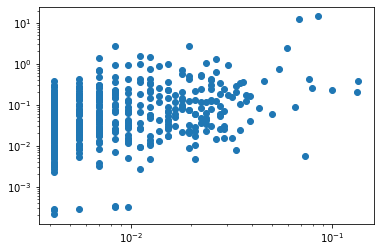

In [10]:
plt.scatter(df.tstop-df.tstart, df.ampl_rec)
plt.xscale("log")
plt.yscale("log")

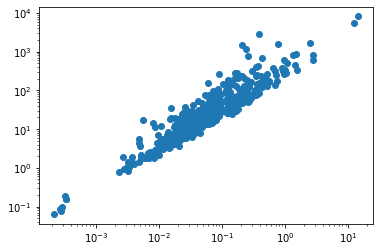

In [11]:
plt.scatter(df.ampl_rec, df.ed_rec)
plt.xscale("log")
plt.yscale("log")

In [ ]:
df[df.ed_rec<1]

In [4]:
df[df.Campaign==6].groupby("TIC").count()
TIC = 130414729
#df.groupby("TIC").Campaign.count().sort_values(ascending=False)[:10]
df[df.TIC==TIC].Campaign.unique()
#df.sort_values(by="ed_rec", ascending=False).head()

array([6, 8])

In [5]:
c=8

path = get_customlc(TIC, c, clcs)

path = f"{CWD}/custom_aperture/" + path

flc = read_custom_aperture_lc(path)
flck = copy.deepcopy(flc)
flcd = custom_detrending(flc)
flcd = flcd.find_flares()

#flcd.flares.sort_values(by="ed_rec",ascending=False)

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(16,5))
g = 14

ax.plot(flck.time, flck.flux, c="orange", label=f"TIC {flc.targetid}, S{flc.campaign}");#flc.time, 
ax.plot(flcd.time,flcd.it_med+3*flcd.detrended_flux_err, c="r");
ax.plot(flcd.time,flcd.detrended_flux, c="g");
for i, f in flcd.flares.iterrows():
    cond = ((flcd.cadenceno >= f.cstart) & (flcd.cadenceno <= f.cstop))
    end = np.where(flcd.cadenceno == f.cstop)[0][0]
    sta = np.where(flcd.cadenceno == f.cstart)[0][0]
    print(end, sta, flcd.time[sta],flcd.time[end],)
    ax.axvspan(flcd.time[sta]-.5,flcd.time[end]+.5,alpha=.4

            )
#f = flcd.flares.iloc[2]
#plt.xlim(f.tstart-1.1,f.tstop+1.1);
#plt.xlim(f.cstart-1000,f.cstop+1000);
#plt.ylim(1600,2000)
#plt.xlim(298200,298600)
#plt.xlim(1641.81,1644)
plt.xlabel("time",fontsize=14)
plt.ylabel("flux",fontsize=14)
plt.legend(fontsize=14)
plt.savefig(f"{CWD}/plots/TIC{flc.targetid}_s{flc.campaign}.png",dpi=300)
plt.close()

107ca_tess2019100910514-s0008-0000000130414729-0000-s_lc.fits
Found peak in periodogram at  0.5 1 / d
SNR at  1.6357777055381812
Found peak in periodogram at  0.5905489781918593 1 / d
SNR at  0.9166148080154857
Window lengths:  [75, 75]


/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/107ca_tess2019100910514-s0008-0000000130414729-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Do last SavGol round.


Found 0 candidate(s) in the (0,7583) gap.
Found 0 candidate(s) in the (7583,12039) gap.


In [6]:
c=6

path = get_customlc(TIC, c, clcs)
for path in clcs[:16]:
    path = f"{CWD}/custom_aperture/" + path

    flc = read_custom_aperture_lc(path)
    flck = copy.deepcopy(flc)
    flcd = custom_detrending(flc)
    flcd = flcd.find_flares()

    #flcd.flares.sort_values(by="ed_rec",ascending=False)

    fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(16,5))
    g = 14

    ax.plot(flck.time, flck.flux, c="orange", label=f"TIC {flc.targetid}, S{flc.campaign}");#flc.time, 
    ax.plot(flcd.time,flcd.it_med+3*flcd.detrended_flux_err, c="r");
    ax.plot(flcd.time,flcd.detrended_flux, c="g");
    for i, f in flcd.flares.iterrows():
        cond = ((flcd.cadenceno >= f.cstart) & (flcd.cadenceno <= f.cstop))
        end = np.where(flcd.cadenceno == f.cstop)[0][0]
        sta = np.where(flcd.cadenceno == f.cstart)[0][0]
        print(end, sta, flcd.time[sta],flcd.time[end],)
        ax.axvspan(flcd.time[sta]-.5,flcd.time[end]+.5,alpha=.4
                
                )
    #f = flcd.flares.iloc[2]
    #plt.xlim(f.tstart-1.1,f.tstop+1.1);
    #plt.xlim(f.cstart-1000,f.cstop+1000);
    #plt.ylim(1600,2000)
    #plt.xlim(298200,298600)
    #plt.xlim(1641.81,1644)
    plt.xlabel("time",fontsize=14)
    plt.ylabel("flux",fontsize=14)
    plt.legend(fontsize=14)
    plt.savefig(f"{CWD}/plots/TIC{flc.targetid}_s{flc.campaign}.png",dpi=300)
    plt.close()

82ca_tess2019090612211-s0006-0000000130414729-0000-s_lc.fits
82ca_tess2019102415564-s0006-0000000130414729-0000-s_lc.fits
Found peak in periodogram at  0.8175787360326054 1 / d
SNR at  1.5147692947854259
Found peak in periodogram at  0.8567107714555284 1 / d
SNR at  0.884602866345598
Found peak in periodogram at  0.8150005144369051 1 / d
SNR at  1.203892032186347
Window lengths:  [75, 107, 75]


/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/0ca_tess2019082014090-s0001-0000000029780677-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Do last SavGol round.


Found 0 candidate(s) in the (0,9073) gap.
Found 2 candidate(s) in the (9073,15090) gap.
Found 0 candidate(s) in the (15090,17805) gap.
/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


9411 9368 1340.071716563175 1340.1314389401898
11673 11653 1343.284226463416 1343.3120043211652


/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/100ca_tess2019090910225-s0007-0000000318801864-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  0.6227471862590057 1 / d
SNR at  1.8998314725944385
Found peak in periodogram at  0.5351483529282053 1 / d
SNR at  2.2243830311939776
Window lengths:  [87, 85]
Do last SavGol round.


Found 1 candidate(s) in the (0,8040) gap.
Found 0 candidate(s) in the (8040,16063) gap.


1361 1358 1493.731166620418 1493.7353333230667


/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/101ca_tess2019090910464-s0007-0000000366567664-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  1.3592089322014473 1 / d
SNR at  1.9160416594292828
Found peak in periodogram at  1.361115669807807 1 / d
SNR at  1.3703188639473436
Window lengths:  [179, 93]
Do last SavGol round.


Found 2 candidate(s) in the (0,8040) gap.
Found 1 candidate(s) in the (8040,16063) gap.


761 758 1492.898242349501 1492.9024091657718
4127 4124 1497.5858841809347 1497.5900509506394
11326 11320 1509.2763281422465 1509.2846615219335


/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/102ca_tess2019090910530-s0007-0000000410898932-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  0.5350703847673017 1 / d
SNR at  1.7878496781524504
Found peak in periodogram at  0.5351476937662467 1 / d
SNR at  1.9596156453203855
Window lengths:  [75, 75]
Do last SavGol round.


Found 0 candidate(s) in the (0,8040) gap.
Found 0 candidate(s) in the (8040,16063) gap.
/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/103ca_tess2019090910582-s0008-0000000000926898-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  0.5364191359419801 1 / d
SNR at  1.5378175294791143
Found peak in periodogram at  0.5 1 / d
SNR at  1.5034812946200335
Window lengths:  [75, 75]
Do last SavGol round.


Found 0 candidate(s) in the (0,7583) gap.
Found 0 candidate(s) in the (7583,12039) gap.
/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/103ca_tess2019102415201-s0008-0000000000926898-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  0.5364191359419801 1 / d
SNR at  1.5378175294791143
Found peak in periodogram at  0.5 1 / d
SNR at  1.5034812946200335
Window lengths:  [75, 75]
Do last SavGol round.


Found 0 candidate(s) in the (0,7583) gap.
Found 0 candidate(s) in the (7583,12039) gap.
/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/104ca_tess2019090911104-s0008-0000000007975441-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  2.157062438590544 1 / d
SNR at  1.4093586843991597
Found peak in periodogram at  0.5 1 / d
SNR at  1.4824480171938086
Window lengths:  [91, 115]
Do last SavGol round.


Found 2 candidate(s) in the (0,7583) gap.
Found 1 candidate(s) in the (7583,12039) gap.


4340 4335 1524.3440993687407 1524.351043777208
6753 6742 1527.6968456458667 1527.7121232072186
9270 9265 1537.9341537722316 1537.9410980260993


/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/105ca_tess2019090911241-s0008-0000000011654435-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  0.5 1 / d
SNR at  1.7349795269965038
Found peak in periodogram at  0.5905481459907036 1 / d
SNR at  0.8459130507237254
Window lengths:  [75, 75]
Do last SavGol round.


Found 0 candidate(s) in the (0,7583) gap.
Found 0 candidate(s) in the (7583,12039) gap.
/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/106ca_tess2019090911283-s0008-0000000044984200-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  8.857952675873822 1 / d
SNR at  4.216236815425429
Found peak in periodogram at  0.5 1 / d
SNR at  2.550605976136463
Window lengths:  [75, 297]
Do last SavGol round.


Found 0 candidate(s) in the (0,7583) gap.
Found 0 candidate(s) in the (7583,12039) gap.
/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/107ca_tess2019100910514-s0008-0000000130414729-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  0.5 1 / d
SNR at  1.6357777055381812
Found peak in periodogram at  0.5905489781918593 1 / d
SNR at  0.9166148080154857
Window lengths:  [75, 75]
Do last SavGol round.


Found 0 candidate(s) in the (0,7583) gap.
Found 0 candidate(s) in the (7583,12039) gap.
/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/108ca_tess2019090911533-s0008-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Do a coarse spline interpolation to remove trends.
Found peak in periodogram at  1.7746387447600904 1 / d
SNR at  1.851520582218814
Found peak in periodogram at  1.737455427894512 1 / d
SNR at  1.4139521920238283
Window lengths:  [137, 75]
Do last SavGol round.


Found 0 candidate(s) in the (0,7732) gap.
Found 0 candidate(s) in the (7732,12338) gap.
/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/108ca_tess2019102509445-s0008-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  1.7928478696852346 1 / d
SNR at  1.6225490224438108
Found peak in periodogram at  0.5905455191142326 1 / d
SNR at  1.4393392190368863
Window lengths:  [133, 75]
Do last SavGol round.


Found 3 candidate(s) in the (0,7583) gap.
Found 0 candidate(s) in the (7583,12039) gap.


60 57 1518.3714523349918 1518.375619064811
2058 2053 1521.1576071466811 1521.1645517017741
2545 2542 1521.8367846488602 1521.8409513821125


/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/109ca_tess2019090911560-s0008-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  0.5364187261357645 1 / d
SNR at  1.6892713970560636
Found peak in periodogram at  0.5905472801670258 1 / d
SNR at  0.9608452561794255
Window lengths:  [75, 75]
Do last SavGol round.


Found 0 candidate(s) in the (0,7583) gap.
Found 2 candidate(s) in the (7583,12039) gap.


8143 8138 1536.3548847853435 1536.3618292266988
9138 9133 1537.746550184162 1537.7534946188239


/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/109ca_tess2019102510083-s0008-0000000167894019-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  0.6274655414751756 1 / d
SNR at  1.6010640050726852
Found peak in periodogram at  0.5905472801670258 1 / d
SNR at  1.0592077926839456
Window lengths:  [75, 75]
Do last SavGol round.


Found 0 candidate(s) in the (0,7583) gap.
Found 3 candidate(s) in the (7583,12039) gap.


8141 8138 1536.3548847853435 1536.3590514501452
9138 9133 1537.746550184162 1537.7534946188239
10250 10242 1539.2868248551993 1539.2979359364422


/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/10ca_tess2019100710504-s0001-0000000401984769-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  0.5151224660245644 1 / d
SNR at  1.6546077761659987
Found peak in periodogram at  0.5445884350539654 1 / d
SNR at  1.694477620722685
Found peak in periodogram at  0.5 1 / d
SNR at  1.2086790714318305
Window lengths:  [75, 75, 75]
Do last SavGol round.


Found 0 candidate(s) in the (0,9073) gap.
Found 0 candidate(s) in the (9073,15090) gap.
Found 0 candidate(s) in the (15090,17805) gap.
/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/110ca_tess2019091014092-s0008-0000000184457945-0000-s_lc.fits' mode='rb' closefd=True>
  import sys


Found peak in periodogram at  0.59104649873238 1 / d
SNR at  1.7188175290068843
Found peak in periodogram at  0.6207307307347567 1 / d
SNR at  1.3688646453789612
Window lengths:  [75, 75]
Do last SavGol round.


Found 0 candidate(s) in the (0,7583) gap.
Found 0 candidate(s) in the (7583,12039) gap.


In [ ]:
CWD = "/".join(os.getcwd().split("/")[:-1])
respath = f"{CWD}/flare_tables/2019_11_18_TESSUCDs_flares.csv"
df = pd.read_csv(respath)
f = df
f["x"] =f.tstop-f.tstart
f = f.sort_values(by="x")
x = (f.tstop-f.tstart).values
x = f.ed_rec.values
y = f.ampl_rec.values
plt.scatter(x, y)
plt.scatter(flcd.flares.ed_rec, flcd.flares.ampl_rec)
#plt.scatter(flcd.flares.tstop-flcd.flares.tstart, flcd.flares.ed_rec)
plt.xscale("log")
plt.yscale("log")
#np.polyfit(f.tstop-f.tstart, f.ed_rec,1)
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.power(x , b)
popt, pcov = curve_fit(func, x, y)
x=np.array([5e-4,5e-3,5e-2,5e-1])
plt.plot(x, func(x, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.legend()
func(0.4, *popt),func(0.6, *popt)

In [ ]:
f = flcd.flares.loc[[0,1,5],:]
f["x"] =f.tstop-f.tstart
f = f.sort_values(by="x")
x = (f.tstop-f.tstart).values
y = f.ampl_rec.values
plt.scatter(x, y)
plt.xscale("log")
plt.yscale("log")
#np.polyfit(f.tstop-f.tstart, f.ed_rec,1)
from scipy.optimize import curve_fit
def func(x, a):
    return a * np.power(x , .965)#b=1.465 for edrec, b=0.965 for ampl_rec
popt, pcov = curve_fit(func, x, y)
x=np.array([5e-4,5e-3,5e-2,5e-1])
plt.plot(x, func(x, *popt), 'r-',
         label='fit: a=%5.3f' % tuple(popt))
plt.legend()
func(0.4, *popt),func(0.6, *popt)
#ED = (7981.423328873443, 14456.196424545316) s, amplitude=(1.856542468781827, 2.7455727338847487)

In [ ]:
from altaipony.fakeflares import aflare
plt.figure(figsize=(16,5))
g = 14

plt.plot(flck.time, flck.flux, c="orange");#flc.time, 
#plt.plot(flcd.time,flcd.it_med+3*flcd.detrended_flux_err, c="r");
#plt.plot(flcd.time,flcd.detrended_flux, c="g");
f = flcd.flares.iloc[3]
plt.xlim(f.tstart-.5,f.tstop+.5);
#plt.ylim(1.36e5,1.4e5)
#plt.xlim(298200,298600)
#plt.xlim(1641.81,1644)
for a in np.linspace(.9,1.7,10):
    for d in np.linspace(.4,.6,10):
        plt.plot(flcd.time,flcd.it_med*aflare(flcd.time, 1641.835, d/6, a,) + flcd.it_med, c="grey", alpha=.05)
plt.title("ampl=1.9-2.7, dur=.4-.6 d")
plt.savefig("/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/weird_feature/flarefit1.png", dpi=300)

In [ ]:
tpf = search_targetpixelfile("TIC" + str(flcd.targetid), sector=c).download()

In [ ]:
tpf.interact()

In [ ]:
markers =  ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

358108509 1 last flare suffers from de-trending being weird at the end of the LC
340703996 2 first flare could also be an undetrended wiggle in the LC